In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]

import okama as ok

## Get information about a single asset

You can start with getting general information about a single asset / index.

In [2]:
one_asset = ok.Asset('VOO.US')
one_asset

symbol                         VOO.US
name             Vanguard S&P 500 ETF
country                           USA
exchange                    NYSE ARCA
currency                          USD
type                              ETF
first date                    2010-10
last date                     2021-03
period length                    10.4
dtype: object

In [3]:
# live (20 min delay) price
one_asset.price

359.96

In [4]:
#dividends history
one_asset.dividends.tail(10)

Date
2018-09-26    1.207
2018-12-17    1.289
2019-03-21    1.455
2019-06-27    1.386
2019-09-26    1.301
2019-12-23    1.429
2020-03-10    1.178
2020-06-29    1.433
2020-09-29    1.309
2020-12-22    1.383
Freq: D, Name: VOO.US, dtype: float64

If you doubt about ticker availability or asset name, check it with _search_:

In [5]:
ok.search('exxon')

[['XOM.US',
  'XOM',
  'Exxon Mobil Corporation',
  'USA',
  'NYSE',
  'USD',
  'Common Stock'],
 ['XONA.XETR',
  'XONA',
  'Exxon Mobil Corporation',
  'Germany',
  'XETR',
  'EUR',
  'Common Stock'],
 ['XONA.XSTU',
  'XONA',
  'EXXON MOBIL (XONA.SG)',
  'Germany',
  'XSTU',
  'EUR',
  'Common Stock'],
 ['XONA.XFRA',
  'XONA',
  'Exxon Mobil Corporation',
  'Germany',
  'XFRA',
  'EUR',
  'Common Stock']]

## Namespaces

In [6]:
# available namespaces
ok.namespaces

{'CBR': 'Central Banks official currency exchange rates',
 'CC': 'Cryptocurrency pairs with USD',
 'COMM': 'Commodities prices',
 'FX': 'FOREX currency market',
 'INDX': 'Indexes',
 'INFL': 'Inflation',
 'MOEX': 'Moscow Exchange',
 'PIF': 'Russian mutual funds',
 'RATE': 'Bank deposit rates',
 'RE': 'Real estate prices',
 'US': 'US Stock Exchanges and mutual funds',
 'XAMS': 'Euronext Amsterdam',
 'XETR': 'XETRA Exchange',
 'XFRA': 'Frankfurt Stock Exchange',
 'XSTU': 'Stuttgart Exchange'}

In [7]:
# available symbols in namespace
ok.symbols_in_namespace('INDX')

,symbol,ticker,name,country,exchange,currency,type
0,000906.INDX,000906,CHINA SECURITIES INDEX 800,Unknown,INDX,USD,INDEX
1,0O7N.INDX,0O7N,SCALE ALL SHARE GR EUR,Germany,INDX,EUR,INDEX
2,3LHE.INDX,3LHE,ESTX 50 CORPORATE BOND TR,Greece,INDX,EUR,INDEX
3,990100.INDX,990100,MSCI International World Index Price,Unknown,INDX,USD,INDEX
4,ACWI.INDX,ACWI,MSCI International ACWI Net Index US,USA,INDX,USD,INDEX
...,...,...,...,...,...,...,...
588,XNG.INDX,XNG,ARCA Natural Gas,USA,INDX,USD,INDEX
589,XOI.INDX,XOI,ARCA Oil,USA,INDX,USD,INDEX
590,XU030.INDX,XU030,BIST 30,Turkey,INDX,TRY,INDEX
591,XU100.INDX,XU100,BIST 100,Turkey,INDX,TRY,INDEX


## Compare several assets from different stock markets. Get the currency adjusted perfomance

In [8]:
ls = ['SPY.US', 'BND.US', 'GC.COMM', 'EUR.FX']
currency = 'EUR'

In [9]:
x = ok.AssetList(ls, ccy=currency, last_date='2020-01')  # first_date and last_date limits the Rate of Return time series
x

symbols          [SPY.US, BND.US, GC.COMM, EUR.FX]
currency                                       EUR
first date                                 2007-05
last_date                                  2020-01
period length                   12 years, 9 months
inflation                                 EUR.INFL
dtype: object

In [10]:
x.names

{'SPY.US': 'SPDR S&P 500 ETF Trust',
 'BND.US': 'Vanguard Total Bond Market Index Fund ETF Shares',
 'GC.COMM': 'Gold',
 'EUR.FX': 'EUR'}

lets see the accumulated return and comapare it with the inflation.

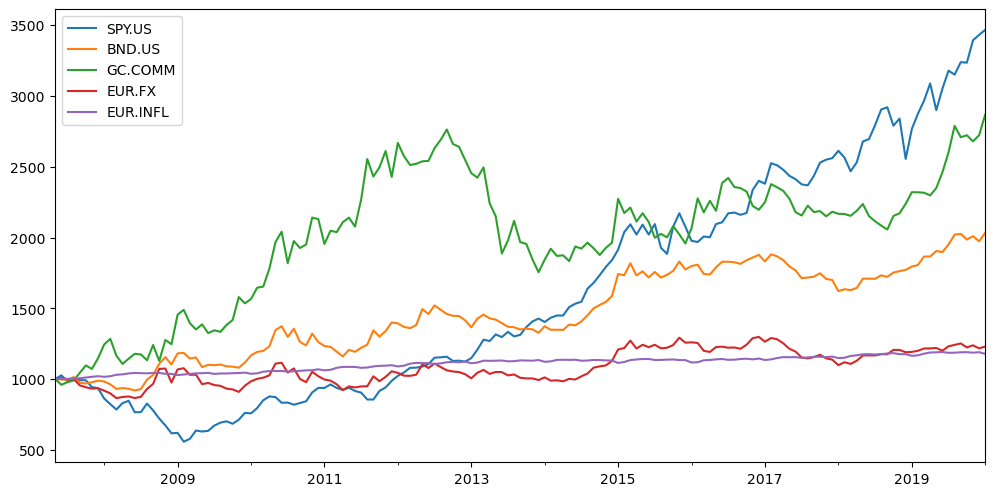

In [11]:
x.wealth_indexes.plot();

Drawdowns history is availably and easy to see

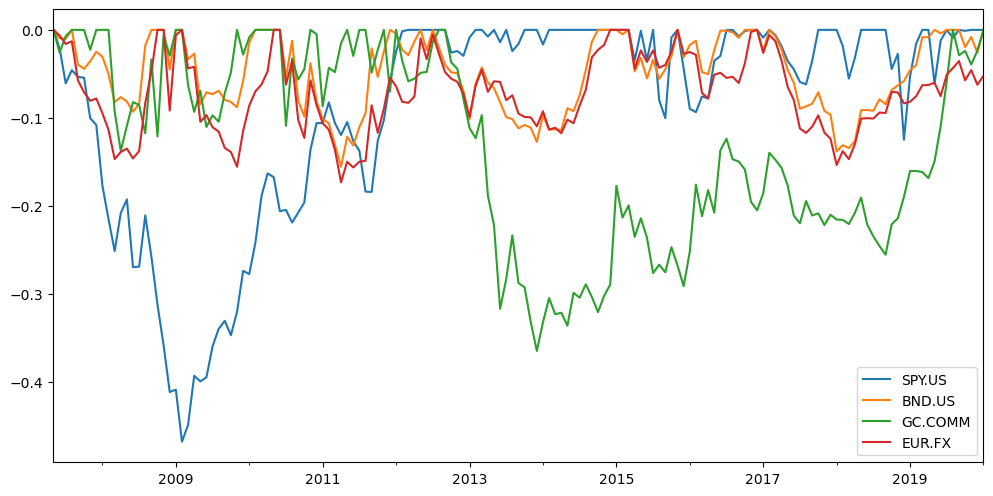

In [12]:
x.drawdowns.plot();

See the dividend yield history for all the assets in the list.

In [13]:
x.dividend_yield

,SPY.US,BND.US,GC.COMM,EUR.FX
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
2007-05,0.000000,0.001699,0.0,0.0
...,...,...,...,...
2020-01,0.017465,0.026664,0.0,0.0
2020-01,0.017465,0.026664,0.0,0.0
2020-01,0.017465,0.026664,0.0,0.0
2020-01,0.017465,0.026664,0.0,0.0


... or plot the same results

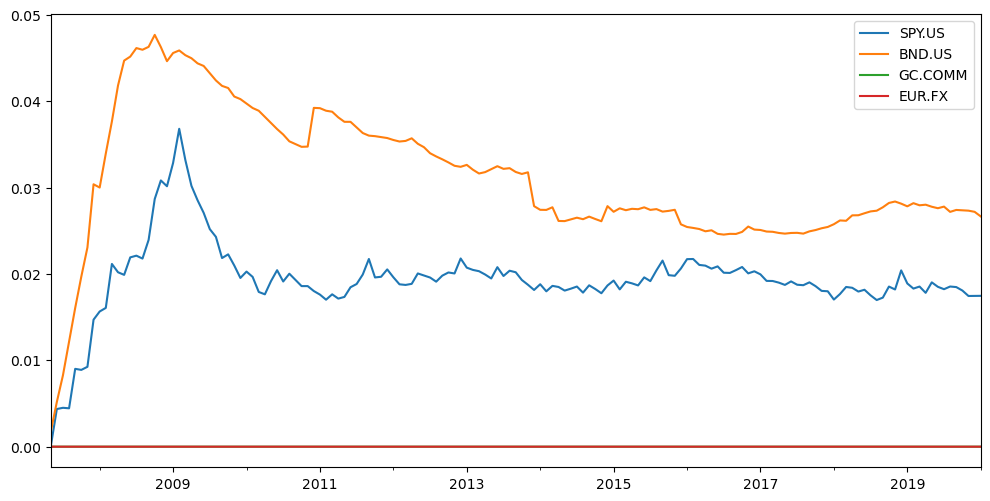

In [14]:
x.dividend_yield.plot();

_describe_ method shows all the main parameters (risk metrics, rate of return etc.) for the list of assets.

In [15]:
x.describe(years=[1, 10])  # You can specifie the period or leave the default: 1, 5 and 10 years

,property,period,BND.US,EUR.FX,GC.COMM,SPY.US,inflation
0,Compound return,YTD,0.030712,0.010700,0.053655,0.010296,-0.010000
1,CAGR,1 years,0.132887,0.031992,0.236526,0.253479,0.011915
2,CAGR,10 years,0.057090,0.022543,0.062417,0.164265,0.012802
3,CAGR,"12 years, 9 months",0.057247,0.016364,0.086163,0.102419,0.012940
4,Dividend yield,LTM,0.026664,0.000000,0.000000,0.017465,NaN
5,Risk,"12 years, 9 months",0.107526,0.105235,0.191104,0.150574,NaN
6,CVAR,"12 years, 9 months",0.113593,0.141757,0.271250,0.284815,NaN
7,Max drawdowns,"12 years, 9 months",-0.155645,-0.173337,-0.365001,-0.468160,NaN
8,Max drawdowns dates,"12 years, 9 months",2011-04,2011-04,2013-12,2009-02,NaN
9,Inception date,None,2007-05,2000-01,1979-01,1993-02,2007-05


#### Correlation Matrix

If you need to check the correlation (or covariance) between assets returns, it's easy to use native Pandas functions.

Monthly rate of return time series are available with `.ror` property:

In [16]:
x.ror

,SPY.US,BND.US,GC.COMM,EUR.FX
2007-05,0.048581,0.006188,-0.014908,0.0142
2007-06,-0.021005,-0.009580,-0.025873,-0.0065
2007-07,-0.040600,-0.000488,0.019122,-0.0096
2007-08,0.015940,0.017946,0.012228,0.0031
2007-09,-0.008042,-0.039270,0.054033,-0.0450
...,...,...,...,...
2019-09,0.028064,0.002652,-0.028810,0.0084
2019-10,-0.001102,-0.019670,0.005055,-0.0227
2019-11,0.048945,0.011895,-0.015842,0.0123
2019-12,0.011194,-0.018088,0.016205,-0.0174


The correlation matrix is obtained by `x.ror.corr()`

In [17]:
x.ror.corr()

,SPY.US,BND.US,GC.COMM,EUR.FX
SPY.US,1.000000,0.195417,-0.081071,0.251927
BND.US,0.195417,1.000000,0.348563,0.936173
GC.COMM,-0.081071,0.348563,1.000000,0.222399
EUR.FX,0.251927,0.936173,0.222399,1.000000


Covariance matrix:

In [18]:
x.ror.cov()

,SPY.US,BND.US,GC.COMM,EUR.FX
SPY.US,0.001541,0.000225,-0.000160,0.000294
BND.US,0.000225,0.000858,0.000512,0.000815
GC.COMM,-0.000160,0.000512,0.002512,0.000331
EUR.FX,0.000294,0.000815,0.000331,0.000883


And if you need a correlation for a certain period only, rolling correlation could be used:

In [19]:
x.ror.rolling(window=24).corr().loc[('2020-01',)]  #  rolling correlation time series are sliced to get the 24 months correlation in 2020-01

,SPY.US,BND.US,GC.COMM,EUR.FX
SPY.US,1.000000,0.096914,-0.133586,0.228765
BND.US,0.096914,1.000000,0.475404,0.763208
GC.COMM,-0.133586,0.475404,1.000000,0.163343
EUR.FX,0.228765,0.763208,0.163343,1.000000


## Basic portfolio methods

Lets create a portfolio with 3 assets and base currency USD. We need to specify weigts.

In [20]:
tickers = ['VNQ.US', 'DBXD.XETR', 'MCFTR.INDX']  # we can create lists of assets and portfolio containing general type of assets and **indexes**
w = [0.5, 0.25, 0.25]
currency = 'USD'

In [21]:
y = ok.Portfolio(tickers, ccy=currency, weights=w)
y

symbols          [VNQ.US, DBXD.XETR, MCFTR.INDX]
weights                        [0.5, 0.25, 0.25]
currency                                     USD
first date                               2007-02
last_date                                2021-02
period length                 14 years, 1 months
dtype: object

In [22]:
y.table

,asset name,ticker,weights
0,Vanguard Real Estate Index Fund ETF Shares,VNQ.US,0.50
1,Xtrackers DAX UCITS ETF 1C,DBXD.XETR,0.25
2,MOEX Total Return,MCFTR.INDX,0.25


Portfolio has the same property _wealth_index_ (accumulated return) as AssetList objects.

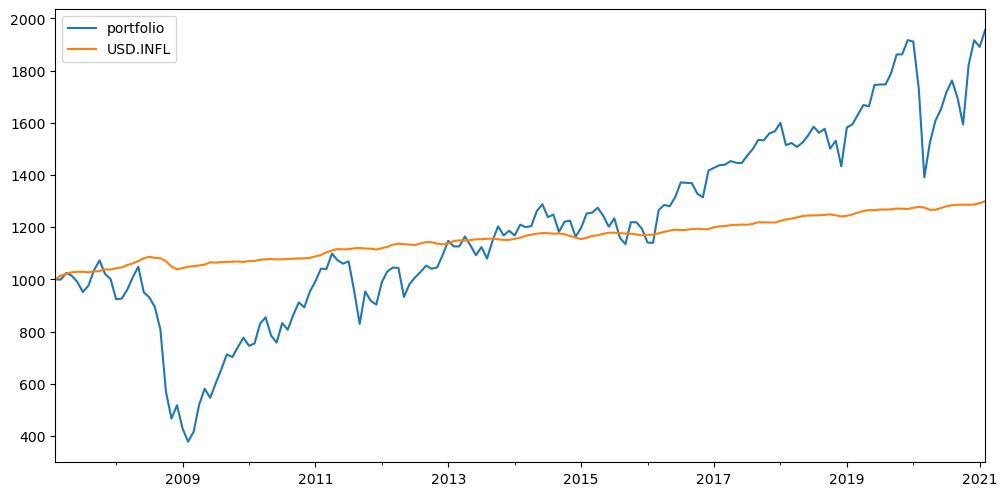

In [23]:
y.wealth_index.plot();

### Risk metrics

You can use risk(volatility or std), semideviation, max drawdown, var and cvar metrics.

In [24]:
y.risk_annual

0.2338334038279252

In [25]:
y.semideviation_annual

0.1820441382335229

In [26]:
y.get_var_historic(level=1)

0.5530606491364427

In [27]:
y.get_cvar_historic(level=5)

0.5147121945017035

In [28]:
y.drawdowns.min()

-0.6474488051054198

_describe_ shows main properties for the portfolio for different trailing periods.

In [29]:
y.describe()

,property,rebalancing,period,portfolio,inflation
0,compound return,1 year,YTD,0.020689,0.009824
1,CAGR,1 year,1 years,0.131379,0.016856
2,CAGR,1 year,5 years,0.113897,0.020959
3,CAGR,1 year,10 years,0.068355,0.017442
4,CAGR,1 year,14.0 years,0.054883,0.018771
5,CAGR,1 month,14.0 years,0.048784,0.018771
6,CAGR,Not rebalanced,14.0 years,0.039660,0.018771
7,Dividend yield (USD),1 month,LTM,0.037954,NaN
8,Dividend yield (EUR),1 month,LTM,0.000000,NaN
9,Dividend yield (RUB),1 month,LTM,0.000000,NaN


### Forecasting return

Monte Carlo forecast for normal distrubution

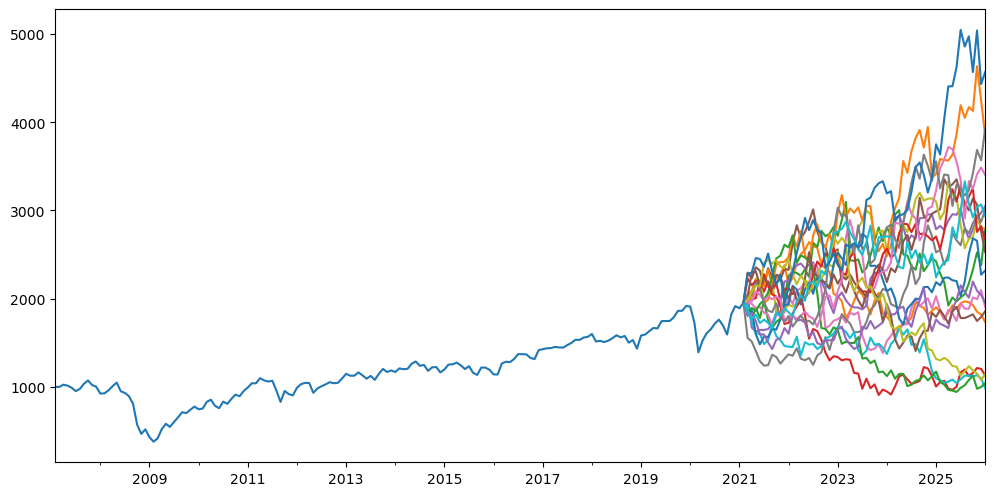

In [30]:
y.plot_forecast_monte_carlo(distr='norm', years=5, n=20)

For normal distribution it's easy to see forecasted accumulated return for a given set of percentiles.

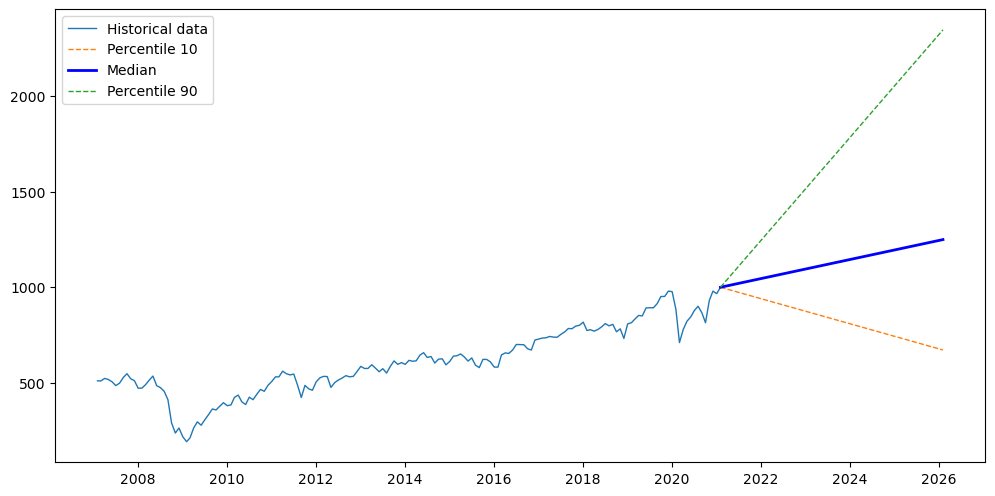

In [31]:
y.plot_forecast(years=5, today_value=1000, percentiles=[10,50,90]);